<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->

# NOAA NDBC buoy data analysis

### Timeseries analysis of ocean conditions in the Southeast Bering Sea
***
Lesson for learning python.<br> Practice downloading, opening, and analyzing buoy data from NDBC: https://www.ndbc.noaa.gov/


With JupyterLite, your code is broken up into “Cells”, and you can run each cell individually. This allows you to work progressively and view the results of each chunk of code. Hover over the symbols in the ribbon at the top of this notebook to see what they do. 


## Part 1: Download NDBC buoy data
***


We are going to look at data from the Southeast Bering Sea.


* Go to https://www.ndbc.noaa.gov/. The map on this webpage shows all the sites where NDBC has data. 


* Type 46073 in the **Station ID Search** bar to navigate to the data corresponding to a site in the Southeast Bering Sea (55°0'28" N 172°0'42" W). 


* Scroll all the way to the bottom of the page and click on the link for **Historical Data & Climatic Summaries**. 


* You will be brought to a new page. Under **Historical data (data descriptions)**, click any year that is listed to the right of **Standard meteorological data**. 

<img src="supp_info/save_txt.png" width="200" align="right"> 

* Click the file link under **Method Two**, then save the file to your computer. Make sure to give the file a meaningful name (try to avoid spaces or special characters) and keep track of where you save it. To save:
    * right click somewhere on the screen and select **Save as...**
    * OR select **File** on the browser menu and then select **Save Page As**.

Take a look at the contents of the txt file and get a feel for what the data's like. Navigate to NDBC's  **Measurement Descriptions and Units** page: https://www.ndbc.noaa.gov/faq/measdes.shtml. Use this to identify the names at the top of the columns in the txt file, and determine which data units are used. In some older files (like the one used in this example), you'll have to look at the section at the very bottom title **Discontinued Measurement Abbreviations** to learn what some of the column names mean.

In this example code, we will be looking at data from 2006 in a file we saved as **NDBC_ID46073_2006.txt** 


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->


## Part 2: Upload NDBC buoy data to this JupyterLite webpage
***

<img src="supp_info/data_file.png" width="170" align="right"> 


Now we'll upload the NDBC buoy data file we previously downloaded to JupyterLite.


* The left side of the screen on this JupyterLite webpage shows folders and files on the webpage. 

* **<em>Drag and drop</em>** your NDBC buoy data text file into the main folder containing this notebook, or use the **Upload Files** icon (upward pointing arrow above the folders) to upload your file. 


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->

## Part 3: Import and analyze NDBC buoy data
***


### 1. Import packages
First we’ll import some commonly used libraries into our notebook that are used to open, manipulate, and plot data. See the four packages listed in the cell below: [pandas](https://pypi.org/project/pandas/), [matplotlib](https://matplotlib.org/), [numpy](https://numpy.org/), and [datetime](https://docs.python.org/3/library/datetime.html).

Click on the gray code cell below. A border should appear around the cell.

To run the cell, press **<em>shift + enter</em>** or **<em>control + enter</em>** on your keyboard, or click the single right-pointing arrow on the ribbon at the top of the notebook. 

While the code is running, an asterisk [\*] will appear in the brackets left of the cells. You will know the code cell ran successfully if a number [1] appears in the bracket. You will know if it didn't run successfully becuase a big red error message will print. Try scrolling to the bottom of the error message to read the error description. You can use this to determine what went wrong, then modify your code and run again.

<!-- If the asterisk remains for a really long time, this could also indicate an error is preventing the cell from completing its run. Try using the **Restart the kernel** button at the top ribbon to restart the notebook (and clear its memory) before running again.  -->

In [1]:
# this is a comment, using a hashtag
# use comments to make notes of what you're doing

# import packages
# import some "as" shorter phrases for easier referencing later
import pandas as pd              # like this
import matplotlib.pyplot as plt  # and this
import numpy as np               # and this
import datetime

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->

### 2. Import buoy data


After your buoy data file had been uploaded to the JupyterLite webpage in **Part 2**, assign the name of your text file to the variable `filename` in the code cell below. Make sure to use quotation marks around the name as in the example below, and change the name in the example code below so the filename matches your filename. 

**<em>Run</em>** the cell.

The code line below where you specified the filename will use the pandas `read_table` function to read the data into a data frame within the code called `df`. Learn more about this function [here](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html). 
* We use `delim_whitespace=True` to tell pyton the separate blank spaces in the txt file into columns. NDBC buoy data files list the data variable names as the top row in the text file. 
* We use `header = [0]` to tell python to use the zeroth (initial) row of the txt file as the header. Python starts counting at 0 (as opposed to, for example, Matlab which starts counting at 1).


The 2006 file used in this code is stored in the `supp_info` folder of this repository. If you have trouble uploading your own file, follow along with this code example by using `filename = 'supp_info/NDBC_ID46073_2006.txt'`


In [2]:
# specify the name of the text file
filename = 'NDBC_ID46073_2006.txt'

# use pandas to read text file into dataframe called df
df = pd.read_table(filename, delim_whitespace=True, header = [0])

# typing out df with nothing after it will print it below the cell
df

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE
0,2006,1,1,0,0,305,8.4,11.4,1.88,8.33,5.70,999,983.1,-0.2,4.0,999.0,99.0,99.0
1,2006,1,1,1,0,304,10.7,12.8,1.95,7.69,5.52,999,983.1,0.4,4.0,-1.9,99.0,99.0
2,2006,1,1,2,0,308,11.9,14.0,2.08,7.69,5.75,999,983.2,0.4,4.0,-1.6,99.0,99.0
3,2006,1,1,3,0,307,9.9,12.8,1.98,5.88,5.53,999,983.3,0.2,4.0,-0.9,99.0,99.0
4,2006,1,1,4,0,322,8.1,9.9,1.94,7.14,5.73,999,983.5,0.7,4.0,-1.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,2006,12,31,19,0,60,12.4,15.8,3.72,8.33,7.25,999,988.4,-3.1,3.6,999.0,99.0,99.0
8675,2006,12,31,20,0,65,13.9,17.4,4.20,9.09,7.29,999,988.7,-3.2,3.6,999.0,99.0,99.0
8676,2006,12,31,21,0,66,12.3,15.5,4.28,9.09,7.41,999,988.7,-3.0,3.6,999.0,99.0,99.0
8677,2006,12,31,22,0,64,13.4,16.2,4.02,9.09,7.32,999,988.8,-3.1,3.6,999.0,99.0,99.0


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->

<br>

### **BEFORE moving on ...**

**... take a close look at your `df` output above.**

The bold row(s) at the top are column headers. The grey and white alternating rows below are the data values. Some of the NDBC files list units as the second row of the data set, while other data files omit the units. 

If your row `0` is a list of units rather than data values, <em>**rerun**</em> the code above again but add `, skiprows=[1]` before the last parenthesis, as below:

`df = pd.read_table(filename, delim_whitespace=True, header = [0], skiprows=[1])`

This will tell python to skip importing row 1 of the txt file. Remember, row 1 is the second row of the file in human terms, but python starts counting at 0.

<br>

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 3A. Clean the data (find NaNs)
***

Let’s clean this data by removing any columns filled with empty data. 

* First, we'll need to tell python which values are NaN, or Not-A-Number. Refer back to the [NDBC Measurement Descriptions and Units](https://www.ndbc.noaa.gov/faq/measdes.shtml) page to determine which values in the data are NaNs. 

* A variable number of 9's are used to denote missing data in NDBC Historical files. Can you identify some of these where you displayed `df` above?

* We'll use a `for` loop to iteratively run through known values representing NaNs, and use pandas to replace any of them found in `df` with [numpy NaN](https://numpy.org/doc/stable/reference/constants.html) values. Check out this [w3schools link](https://www.w3schools.com/python/python_for_loops.asp) to learn more about python for loops.

**<em>Run</em>** the cell below to assign all NaN-intended values to NaNs.


In [3]:

# list of all known NDBC values representing NaNs
# add to this list if you find another!
nan_values = [99, 99.0, 999, 999.0, 999, 9999.0]

# this is a for loop. 
# It loops through each item in nan_values
# within each loop, it will temporarily call that item nan_val
# then do the thing in the indented code line using the temporary nan_val
# before returning to the top of the foor loop and moving to the next item
for nan_val in nan_values:
    
    # replace the bad number with numpy's NaN
    df = df.replace(nan_val, np.nan) 
    

# display df
df

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE
0,2006,1,1,0,0,305.0,8.4,11.4,1.88,8.33,5.70,NaN,983.1,-0.2,4.0,NaN,NaN,NaN
1,2006,1,1,1,0,304.0,10.7,12.8,1.95,7.69,5.52,NaN,983.1,0.4,4.0,-1.9,NaN,NaN
2,2006,1,1,2,0,308.0,11.9,14.0,2.08,7.69,5.75,NaN,983.2,0.4,4.0,-1.6,NaN,NaN
3,2006,1,1,3,0,307.0,9.9,12.8,1.98,5.88,5.53,NaN,983.3,0.2,4.0,-0.9,NaN,NaN
4,2006,1,1,4,0,322.0,8.1,9.9,1.94,7.14,5.73,NaN,983.5,0.7,4.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,2006,12,31,19,0,60.0,12.4,15.8,3.72,8.33,7.25,NaN,988.4,-3.1,3.6,NaN,NaN,NaN
8675,2006,12,31,20,0,65.0,13.9,17.4,4.20,9.09,7.29,NaN,988.7,-3.2,3.6,NaN,NaN,NaN
8676,2006,12,31,21,0,66.0,12.3,15.5,4.28,9.09,7.41,NaN,988.7,-3.0,3.6,NaN,NaN,NaN
8677,2006,12,31,22,0,64.0,13.4,16.2,4.02,9.09,7.32,NaN,988.8,-3.1,3.6,NaN,NaN,NaN


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 3B. Clean the data (remove NaNs from `df`)
***

Now we'll tell python to drop any columns of data that are filled entirely with NaN values.

**<em>Run</em>** the cell below.

<br>

In [4]:
# drop columns filled with NaNs. How? the ones with "all" NaNs.
df = df.dropna(axis = 'columns', how = 'all')

df

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,BAR,ATMP,WTMP,DEWP
0,2006,1,1,0,0,305.0,8.4,11.4,1.88,8.33,5.70,983.1,-0.2,4.0,NaN
1,2006,1,1,1,0,304.0,10.7,12.8,1.95,7.69,5.52,983.1,0.4,4.0,-1.9
2,2006,1,1,2,0,308.0,11.9,14.0,2.08,7.69,5.75,983.2,0.4,4.0,-1.6
3,2006,1,1,3,0,307.0,9.9,12.8,1.98,5.88,5.53,983.3,0.2,4.0,-0.9
4,2006,1,1,4,0,322.0,8.1,9.9,1.94,7.14,5.73,983.5,0.7,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,2006,12,31,19,0,60.0,12.4,15.8,3.72,8.33,7.25,988.4,-3.1,3.6,NaN
8675,2006,12,31,20,0,65.0,13.9,17.4,4.20,9.09,7.29,988.7,-3.2,3.6,NaN
8676,2006,12,31,21,0,66.0,12.3,15.5,4.28,9.09,7.41,988.7,-3.0,3.6,NaN
8677,2006,12,31,22,0,64.0,13.4,16.2,4.02,9.09,7.32,988.8,-3.1,3.6,NaN


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 4A. Clean the data (create datetime objects)
***
We're almost ready to analyze the data. However, notice that the date information is spread across five columns. This can make it more challenging to plot the timeseries data in a meaningful way.

We can combine these five columns into single "datetime" objects containing the full date and time information. To do this, we will need to access the data in the five columns corresponding to date information. 

You can access the data in a given column by typing `df[col]` where `col` is the name of the desired data column in quotation marks. For example, `df["MM"]` would access the months data column.


**<em>Run</em>** the cell below to access the date data and combine them into a single array called `dates`.

<em>If you get a `KeyError` when trying to run the cell, make sure each string (red text in quotes) replacing `col` in the 5 code lines at the top corresponds to the correct `df` date column header. Some of these are different across NDBC data files. For example, year is sometimes indicated by `'YYYY'` and other times `'#YY'`. Look back at `df` to make sure you're using the correct one.</em>

In [5]:
# read date data into individual data arrays
years = df['YYYY']
months = df['MM']
days = df['DD']
hours = df['hh']
mins = df['mm']

# combine them into a single array called ‘dates’
dates = [datetime.datetime.strptime(f'{y}-{m:02d}-{d:02d}T{h:02d}:{mm:02d}', '%Y-%m-%dT%H:%M') 
         for y, m, d, h, mm in zip(years, months, days, hours, mins)]

# print the first 10 values of dates
print('Here are the first 10 dates:')
dates[0:10]

Here are the first 10 dates:


[datetime.datetime(2006, 1, 1, 0, 0),
 datetime.datetime(2006, 1, 1, 1, 0),
 datetime.datetime(2006, 1, 1, 2, 0),
 datetime.datetime(2006, 1, 1, 3, 0),
 datetime.datetime(2006, 1, 1, 4, 0),
 datetime.datetime(2006, 1, 1, 5, 0),
 datetime.datetime(2006, 1, 1, 6, 0),
 datetime.datetime(2006, 1, 1, 7, 0),
 datetime.datetime(2006, 1, 1, 8, 0),
 datetime.datetime(2006, 1, 1, 9, 0)]

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 4B. Clean the data (add datetime objects to a new column in `df`)
***

**<em>Run</em>** the cell below to add the date objects stored in `dates` to a new column in `df` called `"date"`. Look at the new `df` and make sure you see the new data column you created.

In [6]:
# add the dates to a new data column in df called 'date'
df = df.assign(date = dates)

df

,YYYY,MM,DD,hh,mm,WD,WSPD,GST,WVHT,DPD,APD,BAR,ATMP,WTMP,DEWP,date
0,2006,1,1,0,0,305.0,8.4,11.4,1.88,8.33,5.70,983.1,-0.2,4.0,NaN,2006-01-01 00:00:00
1,2006,1,1,1,0,304.0,10.7,12.8,1.95,7.69,5.52,983.1,0.4,4.0,-1.9,2006-01-01 01:00:00
2,2006,1,1,2,0,308.0,11.9,14.0,2.08,7.69,5.75,983.2,0.4,4.0,-1.6,2006-01-01 02:00:00
3,2006,1,1,3,0,307.0,9.9,12.8,1.98,5.88,5.53,983.3,0.2,4.0,-0.9,2006-01-01 03:00:00
4,2006,1,1,4,0,322.0,8.1,9.9,1.94,7.14,5.73,983.5,0.7,4.0,-1.0,2006-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,2006,12,31,19,0,60.0,12.4,15.8,3.72,8.33,7.25,988.4,-3.1,3.6,NaN,2006-12-31 19:00:00
8675,2006,12,31,20,0,65.0,13.9,17.4,4.20,9.09,7.29,988.7,-3.2,3.6,NaN,2006-12-31 20:00:00
8676,2006,12,31,21,0,66.0,12.3,15.5,4.28,9.09,7.41,988.7,-3.0,3.6,NaN,2006-12-31 21:00:00
8677,2006,12,31,22,0,64.0,13.4,16.2,4.02,9.09,7.32,988.8,-3.1,3.6,NaN,2006-12-31 22:00:00


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 5. Plot the Data
***

There are many ways to plot data. A simple one is shown below. 


**<em>Run</em>** the cell below to plot the **water temperature** data.

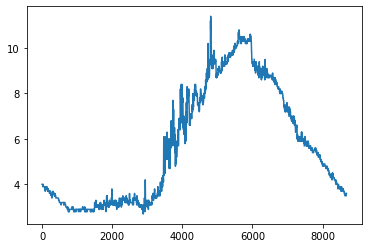

In [7]:
df['WTMP'].plot()

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
Try changing `'WTMP'` to another column name to plot a different data variable, and running the cell again.

*What are the x and y axes of the plot above?*

*What are the units of the variable plotted?* (Refer back to [NDBC Measurement Descriptions and Units](https://www.ndbc.noaa.gov/faq/measdes.shtml))


***
It’s better to be more specific when plotting to make sure we know what we are looking at. Let's plot a different way where we can specify what to use as the x and y axes of the plot, as well as what kind of plot to make. We can also label the y axis of the plot to list the variable units. 

* plot dates on the x axis with `x='date'`
* plot water temperature on the y axis with `y='WTMP'`
* make a line plot with `kind = 'line'`
* label the y axis with `plt.ylabel('degrees C');`


**<em>Run</em>** the cell below to make a timeseries of the **water temperature** data.

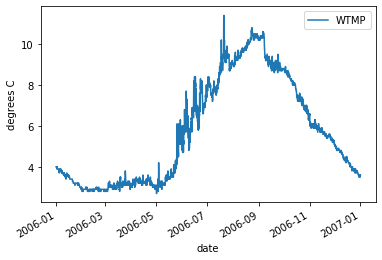

In [8]:
# plot comman specuft
df.plot(x='date', y='WTMP', kind = 'line')

plt.ylabel('degrees C');

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
Now we'll modify the code above to plot a timeseries of the **significant wave height** variable. 

**<em>Run</em>** the cell below to make a timeseries of the **significant wave height** data.

<em>Can you tell what the most common range of significant wave heights is?</em>

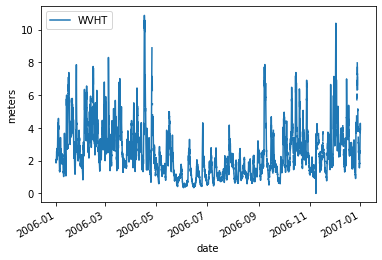

In [9]:
df.plot(x='date', y='WVHT', kind = 'line')
plt.ylabel('meters');

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
Make a histogram of the significant wave height variable by running the code below. 

<em>Is it easier to determine what the most frequent significant wave height is? What is it?</em>

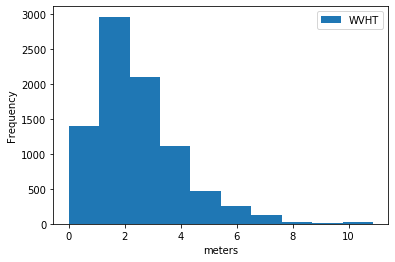

In [10]:
df.plot(y='WVHT', kind = 'hist')
plt.xlabel('meters');

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
We can also create a 'figure' instance to which we can add plots of multiple variables at the same time. 

**<em>Run</em>** the code below to plot the water temperature and air temperature time series together, and add them to a figure instance.

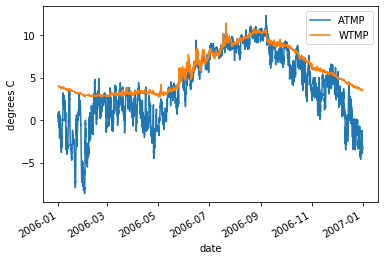

In [11]:
fig, ax = plt.subplots()
df.plot(x='date', y='ATMP', kind = 'line', ax=ax)
df.plot(x='date', y='WTMP', kind = 'line', ax=ax)
plt.ylabel('degrees C');

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
*Do air and water temperatures appear to be related to each other?*

We can remove the timeseries information and plot water temperature and air temperature against each other directly.

Text(0, 0.5, 'Water temperature (degrees C)')

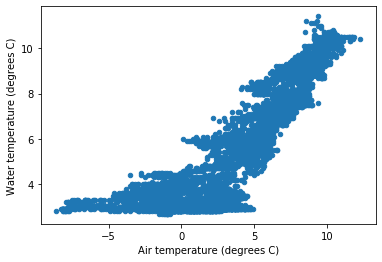

In [12]:
df.plot(x='ATMP', y='WTMP', kind = 'scatter')
plt.xlabel('Air temperature (degrees C)')
plt.ylabel('Water temperature (degrees C)')

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### 6. Analyze the Data
***

Return to your timeseries plot of **water temperature** data. 

1. What is the mean and standard deviation of the water temperature data?

2. Can you tell what percentage of the total time the water was above 10 degrees Celsius? 

3. Can you determine the minimum or maximum temperatures and when these occurred?

We can use code to answer these questions precisely!

#### Task 1
***
**<em>Run</em>** the cells below to calculate and print the mean and standard deviation in water temperatures.

In [13]:
print(df['WTMP'].mean())

5.7247628961370385


In [14]:
print(df['WTMP'].std())

2.566733126602133


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
#### Task 2
***

**<em>Run</em>** the cell below to highlight times where the water temperature was above 10 degrees C, and calculate what percentage of time this was the case.

Modify the first line of code `T = 10` to set a different temperature threshold, and **<em>run</em>** the cell again.

Use this code cell (and your results from **Task 1**) to determine how often the water temperature was more than a standard deviation above the mean, and over which months this occurred.
  



percentage of time water temp is above 10 degC: 5.8%



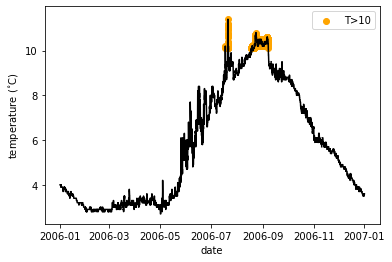

In [15]:
# temperature threshold (degC)
T = 10

# total time series length
total_duration = len(df)

# length of time with temperature above threshold
duration_above = np.sum(df['WTMP'] > T)

# percentage of time above temperature threshold
time_per = 100*duration_above/total_duration

print(f'\npercentage of time water temp is above {T} degC: {time_per:.1f}%\n')

# plot the data
fig, ax = plt.subplots()
plt.plot(df['date'], df['WTMP'], c='black')
plt.scatter(df[(df['WTMP'] > T)].date, df[(df['WTMP'] > T)].WTMP, c='orange', label=f'T>{T}');
plt.xlabel('date')
plt.ylabel('temperature ($^{\circ}$C)')
plt.legend();
fig.savefig('water_temp.png', dpi=300);

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
Notice that this code also saved your plot as `water_temp.png`. You can download the image to your computer by right clicking the file name and selecting **Download**.

<img src="supp_info/save_img.png" width="200" align="right"> 

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
#### Task 3
***
Use the code below to find min and max temperature values, and when these occurred.

Change the `col` variable to air temperature and **<em>run</em>** the cell again. Did air temperature reach minimum and maximum values at the same time as the water temperature?

Try changing `col` to a few different data variables. Make sure you change the units description (`units = 'degrees C'`) to match the correct units for the variable you're plotting.



max WTMP 11.4 degrees C occurred on 2006-07-21 07:00:00
min WTMP 2.7 degrees C occurred on 2006-05-01 09:00:00

image saved as: WTMP_minmax.png


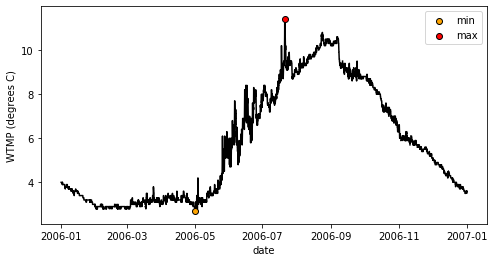

In [16]:
# specify data columm
col = 'WTMP'
units = 'degrees C'

# find min/max values
min_val = df[col].min()
max_val = df[col].max()

# find dates of min/max value occurrences
date_min = df.iloc[df[col].idxmin()].date
date_max = df.iloc[df[col].idxmax()].date

# print
print(f"\nmax {col} {max_val} {units} occurred on {date_max}")
print(f"min {col} {min_val} {units} occurred on {date_min}\n")

# plot the data
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['date'], df[col].values, c='black', zorder=-1)
plt.scatter(date_min, min_val, c='orange', edgecolor='k', label='min');
plt.scatter(date_max, max_val, c='red', edgecolor='k', label='max');
plt.xlabel('date')
plt.ylabel(f'{col} ({units})')
plt.legend();
savename = f'{col}_minmax.png'
print(f'image saved as: {savename}')
fig.savefig(savename, dpi=300)


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
#### Bonus Task
***
Use the code below to create a python function which subsets the data over a chosen date range.


In [17]:
# create a function to find index of date in python range 
def subset_by_date(date_i, date_f, df):
    
    # date_i: initial date 
    # date_f: final date 
    # df: pandas dataframe
    
    indices = []
    
    for date in [date_i, date_f]:
        
        if np.sum(df.date == date) == 0: 
            print(f'date {date} not in file') # print error if given date not in file
            
        else:
        # find index of specified date
            index = df[df.date == date].index.values[0]
            indices.append(index)
            
    print(f'\nsubset data between {date_i} and {date_f}\n')
    return df[indices[0]:indices[1]]


<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
**<em>Run</em>** the cell below using your `subset_by_date` function to plot temperatures over a specified date range. 

Modify the date range by changing  `date1` and `date2` so that your code refers to some range of dates in your specific dataset. You will get an error if either `date1` or `date2` do not correspond to dates in your dataset. 

The cell below makes a timeseries plot of air and water temperatures, as well as plots the two variables against each other directly. 

* Modify the dates in the code cell below to determine how closely related air and water temperatures are in winter 2006 (January - April). 
    * Follow this link to [NASA Worldview](https://worldview.earthdata.nasa.gov/?v=-4261160.540466411,953954.0397129629,-981119.5000918675,3447895.0187195474&r=-125.950&p=arctic&l=Coastlines_15m,MODIS_Terra_CorrectedReflectance_TrueColor&lg=true&s=-172.012,55.008&t=2006-01-31-T20%3A00%3A34Z) to see what the ocean looked like in winter 2006 from MODIS satellite imagery. The Bering Sea station coordinates are shown on the map.
    

* Modify them again to compare how closely they are related in summer 2006 (June - September).
    * Follow this link to [NASA Worldview](https://worldview.earthdata.nasa.gov/?v=-4261160.540466411,953954.0397129627,-981119.5000918673,3447895.0187195474&r=-125.950&p=arctic&l=Coastlines_15m,MODIS_Terra_CorrectedReflectance_TrueColor&lg=true&s=-172.012,55.008&t=2006-09-16-T20%3A00%3A34Z) to see what the ocean looked like in summer 2006.

<em>What's different about these two times?</em>


subset data between 2006-01-01 01:00:00 and 2006-12-31 23:00:00



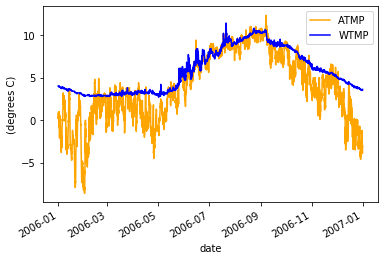

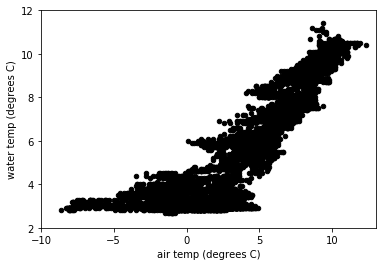

In [22]:

# specify start and end dates of desired date range
date1 = datetime.datetime(year = 2006, month = 1, day = 1, hour = 1, minute = 0)
date2 = datetime.datetime(year = 2006, month = 12, day = 31, hour = 23, minute = 0)


# run the function to create subsetted dataframe
df_subset = subset_by_date(date1, date2, df)

# make timeseries plot
fig, ax = plt.subplots()
df_subset.plot(x='date', y='ATMP', kind = 'line', color='orange', ax = ax);
df_subset.plot(x='date', y='WTMP', kind = 'line', color='blue', ax = ax);
ax.set_ylabel('(degrees C)')

# make plot of water temp vs air temp
fig, ax = plt.subplots()
df_subset.plot(x='ATMP', y='WTMP', kind='scatter', color='black', ax=ax)
ax.set_xlabel('air temp (degrees C)')
ax.set_ylabel('water temp (degrees C)')
ax.set_xlim(-10,13);
ax.set_ylim(2,12);

<!-- 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

This is a markdown (non-code) cell for nice text formatting.
 
If you accidentally opened it, no worries, just 'run' this cell like you would run a code cell and it will go back to its nicely rendered format

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

-->
### Closing out
***
Once you are finished, navigate to **File** in the top ribbon of the webpage. 

From there, **save** the notebook. 

Then, you can **Download** the notebook to save it to your computer. 

Once you are all finished, select **Close and Shutdown Notebook** to terminate the code.

The code you created today can be modified to explore different data. If you’d like to run the code again on JupyterLite at a later date, keep track of the notebook you created today and the link to where you downloaded the data. You can re-upload both to JupyterLite and run the code again, or modify it to explore a new data set.

<img src="supp_info/close.png" width="400" align="center"> 
